# This is Udacity ML basic P4 heading line

### 总体结构以及数据集问题提出

    1.1 Introduction and question list for study.
       -- Titanic disaster data introdction which is downloaded from Kaggle.
       -- Question list
          -- which factor might be the key for survivals?
          -- what is the rank of other factors for survivals?
          -- any conclustion or predition we could make for survivials? and any limitations we have to consider?
          
    1.2 Data Wrangling）：读取数据集，查看常规属性，评估和识别数据质量问题，清理数据
       -- read the data set and check the field
       -- data clean(nan or dup data handle)

    2. 数据分析 (EDA, Exploratory Data Analysis）
       -- single variable impacts on survival
       -- multiple variable correlations on suvival
       -- Visualization for analyzed results.
    探索性数据分析（EDA, Exploratory Data Analysis）：计算统计量，绘制数据可视化，先探索单个变量，再探索变量之间的关系，回应研究问题
    3。Conclusion
       An limitation or prediction?


### 1.1 data set introdcution

Data Dictionary

Variable	Definition	Key

survival 	Survival 	0 = No, 1 = Yes

pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd

sex 	Sex 	

Age 	Age in years 	

sibsp 	# of siblings / spouses aboard the Titanic 	

parch 	# of parents / children aboard the Titanic 	

ticket 	Ticket number 	

fare 	Passenger fare 	

cabin 	Cabin number 	

embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.




### 1.2.1 Read csv file and list the first 5 rows.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
G_CHILD_AGE = 18

tt_file = pd.read_csv("titanic_data.csv", index_col = "PassengerId")
tt_file.head(5)

Populating the interactive namespace from numpy and matplotlib


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.2.2 Data Clean related handlers

In [20]:

def convert_child_age(df):
    """ Add to the Sex field with 'child' type according to the value of Age."""
    if df.Age < G_CHILD_AGE:
        df.Sex =  'child'
    return df

def autolabel(rects):
    """ fill the exact values according to the height in the chart."""
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/3, 1.03*height, '%d' % int(height))
        
def field_digitization(df):
    """convert into integer from string for corrcoef() calculation."""
    
    df.Fare = int(round(float(df.Fare) / 10, 0))
    df.Age = int(round(float(df.Age) / 10, 0))
    
    if df.Sex == 'male':
        df.Sex = 0
    if df.Sex == 'female':
        df.Sex = 1
    if df.Embarked == 'C':
        df.Embarked = 0
    if df.Embarked == 'Q':
        df.Embarked = 1            
    if df.Embarked == 'S':
        df.Embarked = 2         
    return df

# replace the nan age/Fare with the mean() value rather than discarding them 
# since the dataset size is small.
tt_file.Age.fillna(tt_file.Age.mean(),inplace=True)
tt_file.Fare.fillna(tt_file.Fare.mean(),inplace=True)

### 2.1 Consider the sex & numbers from the survived and non-survived people

Survived  Sex   
0         child      52
          female     64
          male      433
1         child      61
          female    195
          male       86
Name: Sex, dtype: int64


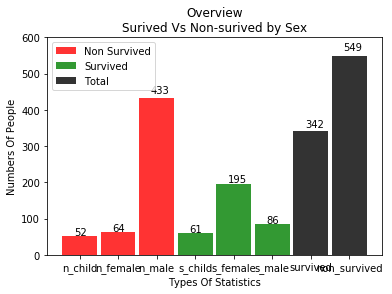

In [21]:
# 2.1 calculate the number of survived and non-survived people with 'male', 'female' and 'child' types.
survived_overview = tt_file.apply(convert_child_age, axis=1).groupby(['Survived',"Sex"])['Sex'].count()
print survived_overview

# non_survived_C - C for child number
# non_survived_F - F for female number
# non_survived_M - M for male number
non_survived_child = survived_overview.iloc[0]
non_survived_female = survived_overview.iloc[1]
non_survived_male = survived_overview.iloc[2]
survived_child = survived_overview.iloc[3]
survived_female = survived_overview.iloc[4]
survived_male = survived_overview.iloc[5]

# total survived and non-survived number
# total_survived - survived number
# total_non_survived - non-survived number
total_survived = survived_female + survived_male + survived_child
total_non_survived = non_survived_female + non_survived_male + non_survived_child
                
y_values = [non_survived_child, non_survived_female, non_survived_male, \
            survived_child, survived_female, survived_male, total_survived, total_non_survived]
# n_ prefix implies non_survived
# s_ prefix implies survived
x_labels = ['n_child', 'n_female','n_male','s_child', 's_female','s_male','survived', 'non_survived']
bar_width = 0.9

rect1 = plt.bar(x_labels[:3], y_values[:3], label = 'Non Survived', color = 'r', alpha = 0.8, width = bar_width)
rect2 = plt.bar(x_labels[3:6], y_values[3:6], label = 'Survived', color = 'g', alpha = 0.8, width = bar_width)
rect3 = plt.bar(x_labels[6:8], y_values[6:8], label = 'Total', color = 'k', alpha = 0.8, width = bar_width)

plt.xlabel('Types Of Statistics')
plt.ylabel('Numbers Of People')
plt.title('Overview\nSurived Vs Non-surived by Sex')
plt.ylim([0, 600])   
plt.legend()
autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()




1) The ration  of non-survived male people (49%) which implies:   


overall male ration 0.582491582492
overall female ration 0.290684624018


([<matplotlib.patches.Wedge at 0x7fe4b7597e50>,
 [Text(0.0513046,1.0988,u'non_survived_male'),
  Text(-1.0915,-0.136508,u'non_survived_female'),
  Text(-0.949764,-0.554931,u'non_survived_child'),
  Text(-0.569635,-0.941019,u'survived_male'),
  Text(0.479472,-0.990003,u'survived_female'),
  Text(1.07403,-0.23762,u'survived_child')],
 [Text(0.0279843,0.599347,u'48.51'),
  Text(-0.595362,-0.074459,u'6.93'),
  Text(-0.518053,-0.30269,u'5.94'),
  Text(-0.31071,-0.513283,u'9.90'),
  Text(0.26153,-0.540002,u'21.78'),
  Text(0.585834,-0.129611,u'6.93')])

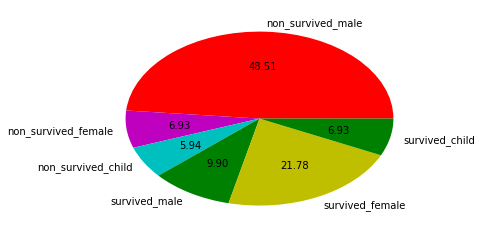

In [22]:
# 2.2 calculate the ration for different types with the computed people number above.
male_ratio = [round(float(non_survived_male) / (total_survived + total_non_survived), 2), 
              round(float(non_survived_female) / (total_survived + total_non_survived), 2),
              round(float(non_survived_child) / (total_survived + total_non_survived), 2),
              round(float(survived_male) / (total_survived + total_non_survived), 2),
              round(float(survived_female) / (total_survived + total_non_survived), 2),
             round(float(survived_child) / (total_survived + total_non_survived), 2)]
print "overall male ration", (float(survived_male) + non_survived_male ) / (total_survived + total_non_survived)
print "overall female ration", (float(survived_female) + non_survived_female ) / (total_survived + total_non_survived)
male_label = ['non_survived_male', 'non_survived_female','non_survived_child', \
              'survived_male', 'survived_female', 'survived_child']
male_ratio_pd = pd.Series(male_ratio, index=male_label)
plt.pie(x=male_ratio, labels=male_label, colors=['r', 'm', 'c', 'g','y','g'], autopct='%.2f')

### 2.1 Conclusions from the overview of survived people by sex:

) The ration  of non-survived male people (about 49%) which implies: 

    -- compare with non-survived female ratio (6.93%) plus non-survied child(5.94)
    
      -- means most of the male did not survived.
      
2) The ration of surived female (21.78%) is the second large number with below 2 cases:

    -- compare with non-survived female ratio (6.93%)
    
      -- means most of the female survived.
      
3) The ration of surived and non-survived child are almost equivalent.(6.93% Vs 5.94%) 

### 2.2 Consider the age impact from the survived and non-survived people

(20, 30]    271
(30, 40]     86
(10, 20]     71
(40, 50]     53
(0, 10]      26
(50, 60]     25
(60, 70]     13
(70, 80]      4
dtype: int64
(20, 30]    136
(30, 40]     69
(10, 20]     44
(0, 10]      38
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
dtype: int64
(70, 80]    0.200000
(60, 70]    0.235294
(20, 30]    0.334152
(10, 20]    0.382609
(40, 50]    0.383721
(50, 60]    0.404762
(30, 40]    0.445161
(0, 10]     0.593750
dtype: float64


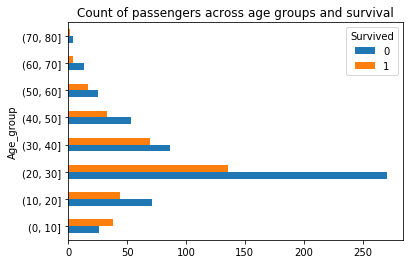

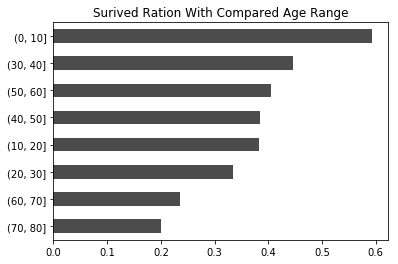

In [23]:
def pick_nonsurvived_age(df):
    if df.Survived == 0 and not np.isnan(df.Age):
        return df.Age
def pick_survived_age(df):
    if df.Survived == 1 and not np.isnan(df.Age):
        return df.Age

d_n_array = np.array(tt_file.apply(pick_nonsurvived_age, axis=1))
d_s_array = np.array(tt_file.apply(pick_survived_age, axis=1))
#print dn_array

binsize = [0,10,20,30,40,50,60,70,80]
cat_n = pd.cut(d_n_array, binsize)
cat_s = pd.cut(d_s_array, binsize)
#print dn_array
print pd.value_counts(cat_n, dropna=True)
print pd.value_counts(cat_s, dropna=True)

# compute the survival ratio with the different age range and output them by sorting method.
ratio_age_range = ((pd.value_counts(cat_s, dropna=True)) / (pd.value_counts(cat_n, dropna=True) \
                        + pd.value_counts(cat_s, dropna=True))).sort_values(axis=0,\
                        ascending=True)
print ratio_age_range

# cut the age data into groups
binsize = [0,10,20,30,40,50,60,70,80]
tt_file['Age_group'] = pd.cut(tt_file['Age'], bins=binsize)

# group data with age groups and surviving status
grouped_size = tt_file.groupby(['Age_group', 'Survived']).size()

# plot the grouped data in grouped bar chart
grouped_size.unstack().plot(kind='barh', stacked=False)
plt.title('Count of passengers across age groups and survival')

fig, axe = plt.subplots(1, 1)
ratio_age_range.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Surived Ration With Compared Age Range', )

### 2.2 Conclusions from the overview of survived people by age:

1) The 0-10 Age (Child) has the highest survived ratio.

2) The young people (20-40) are the biggest gruop among the survived and non-survived group. and 30-40 age range is the 2nd high survival ratio.

### 2.3 Consider the fare impact from the survived and non-survived people

non-survived fare range count
(20, 40]      114
(60, 80]       23
(40, 60]       23
(100, 120]      4
(80, 100]       3
(120, 140]      1
dtype: int64

survived fare range count
(20, 40]      86
(40, 60]      31
(60, 80]      25
(80, 100]     18
(100, 120]    11
(120, 140]     6
dtype: int64

survived fare range ratio
(20, 40]      0.430000
(60, 80]      0.520833
(40, 60]      0.574074
(100, 120]    0.733333
(80, 100]     0.857143
(120, 140]    0.857143
dtype: float64


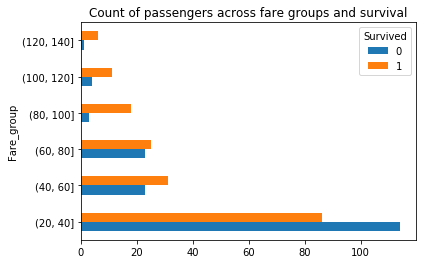

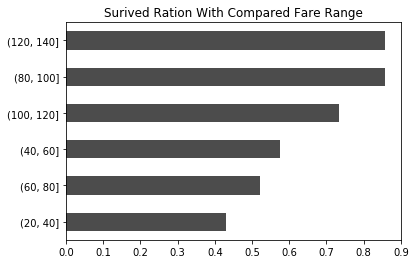

In [24]:
def pick_nonsurvived_fare(df):
    if df.Survived == 0 :
        return df.Fare
def pick_survived_fare(df):
    if df.Survived == 1 :
        return df.Fare
    
d_n_array = np.array(tt_file.apply(pick_nonsurvived_fare, axis=1))
d_s_array = np.array(tt_file.apply(pick_survived_fare, axis=1))
#print dn_array

binsize = [20,40,60,80,100,120,140]
cat_n = pd.cut(d_n_array, binsize)
cat_s = pd.cut(d_s_array, binsize)
#print dn_array
print 'non-survived fare range count'
print pd.value_counts(cat_n, dropna=True)
print '\nsurvived fare range count'
print pd.value_counts(cat_s, dropna=True)
# compute the survival ratio with the different fare range and output them by sorting method.
ratio_fare_range = ((pd.value_counts(cat_s, dropna=True))/ (pd.value_counts(cat_n, dropna=True) \
                                              + pd.value_counts(cat_s, dropna=True))).sort_values(axis=0,\
                                               ascending=True)
print '\nsurvived fare range ratio'
print ratio_fare_range

#cut the fare data into groups
tt_file['Fare_group'] = pd.cut(tt_file['Fare'], bins=binsize)

# group data with fare groups and surviving status
grouped_size = tt_file.groupby(['Fare_group', 'Survived']).size()

# plot the grouped data in grouped bar chart
grouped_size.unstack().plot(kind='barh', stacked=False)
plt.title('Count of passengers across fare groups and survival')

fig, axe = plt.subplots(1, 1)
ratio_fare_range.plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Surived Ration With Compared Fare Range', )

### 2.3 Conclusions from the overview of survived people by fare:

1) the 0-20 fare range is the most group people on the ship.

2) the highest survived rato among the fare range are above 60, which is 120-140, 80-100, and 100-120.

### 2.4 Consider the family-szie impact from the survived and non-survived people

non-survived family size count
(0, 1]    72
(1, 2]    43
(4, 5]    19
(3, 4]    12
(5, 6]     8
(2, 3]     8
(6, 7]     6
(8, 9]     0
(7, 8]     0
dtype: int64

survived family size  count
(0, 1]    89
(1, 2]    59
(2, 3]    21
(5, 6]     4
(4, 5]     3
(3, 4]     3
(8, 9]     0
(7, 8]     0
(6, 7]     0
dtype: int64


Text(0.5,1,u'Count of passengers across family size and survival')

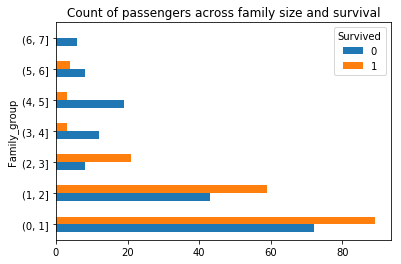

In [25]:
def pick_nonsurivived_familysize(df):
    if df.Survived == 0 :
        return df.SibSp + df.Parch

def pick_survived_familysize(df):
    if df.Survived == 1 :
        return df.SibSp + df.Parch
    
d_n_array = np.array(tt_file.apply(pick_nonsurivived_familysize, axis=1))
d_s_array = np.array(tt_file.apply(pick_survived_familysize, axis=1))
#print dn_array

binsize = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cat_n = pd.cut(d_n_array, binsize)
cat_s = pd.cut(d_s_array, binsize)

print 'non-survived family size count'
print pd.value_counts(cat_n, dropna=True)
print '\nsurvived family size  count'
print pd.value_counts(cat_s, dropna=True)

tt_file['Family_group'] = pd.cut(tt_file['SibSp'] + tt_file['Parch'] , bins=binsize)

# group data with age groups and surviving status
grouped_size = tt_file.groupby(['Family_group', 'Survived']).size()

# plot the grouped data in grouped bar chart
grouped_size.unstack().plot(kind='barh', stacked=False)
plt.title('Count of passengers across family size and survival')

### 2.4 Conclusions from the overview of survived people by family size:

1) the number of people with the family size = 1 or 2 is the biggest group among both non-survived and survived people.

2) the singletons or small family size has more chance to survive.

### 2.5 Consider some field correlations from the survived and non-survived people

Survived    1.000000
Pclass      0.338481
Sex         0.543351
Age         0.071000
SibSp       0.035322
Parch       0.081629
Fare        0.257167
Embarked    0.169718
Name: Survived, dtype: float64


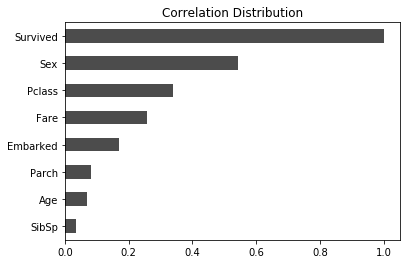

In [26]:
# convert the string type into integer type
tt_refined_file = tt_file.apply(field_digitization, axis=1)
# use corr() to compute the correlation between the field 'Survived' and other fields
tt_series = tt_refined_file.corr()['Survived'].abs()

# output the visualization result
fig, axe = plt.subplots(1, 1)
print tt_series
tt_series.sort_values(axis=0, ascending=True).plot(kind='barh', ax=axe, color='k', alpha=0.7, \
            title='Correlation Distribution', )

### 3 Some findings, prediction and limitation

1) the top3 highest correlations fields are 'Sex'', 'Pclass' and 'Fare'.

2) some predictions

    -- Sex of female has more chance to survive according to 2.2. (and it might lie in the highest priorities for ladies and children in such disaster.
    
    -- Age of 0-10 and 30-40 range have more oppotunity to be saved according to 3.1
    
    -- singletons or small family size has more chance for survive according to 5.1 
    
3) some limitation

    -- some null field such as age, (nearly 1/8 or so) which might lead to incorrect results for such small dataset.
